In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [4]:
data = pd.read_csv('SM1_data.csv')
data=data.set_index('Date')
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
train = data.loc[data.index <'2017-01-01']
test = data.loc[(data.index >= '2017-01-01') & (data.index < '2021-01-01')]



----At 10cm ddepth----


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 173.2884 - mae: 9.0396 - val_loss: 17.7900 - val_mae: 3.2450
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.4944 - mae: 3.1306 - val_loss: 15.9360 - val_mae: 2.8209
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.6359 - mae: 2.8790 - val_loss: 16.3014 - val_mae: 3.0403
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.0570 - mae: 2.8092 - val_loss: 15.1790 - val_mae: 2.7205
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.3295 - mae: 2.7019 - val_loss: 15.6400 - val_mae: 2.8802
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.2696 - mae: 2.6407 - val_loss: 14.6949 - val_mae: 2.7594
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.1341 - mae: 2.5826 - val_loss: 15.6066 - val_mae: 2.6712
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.7378 - mae: 2.6455 - val_loss: 14.5128 - val_mae: 2.6068
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━

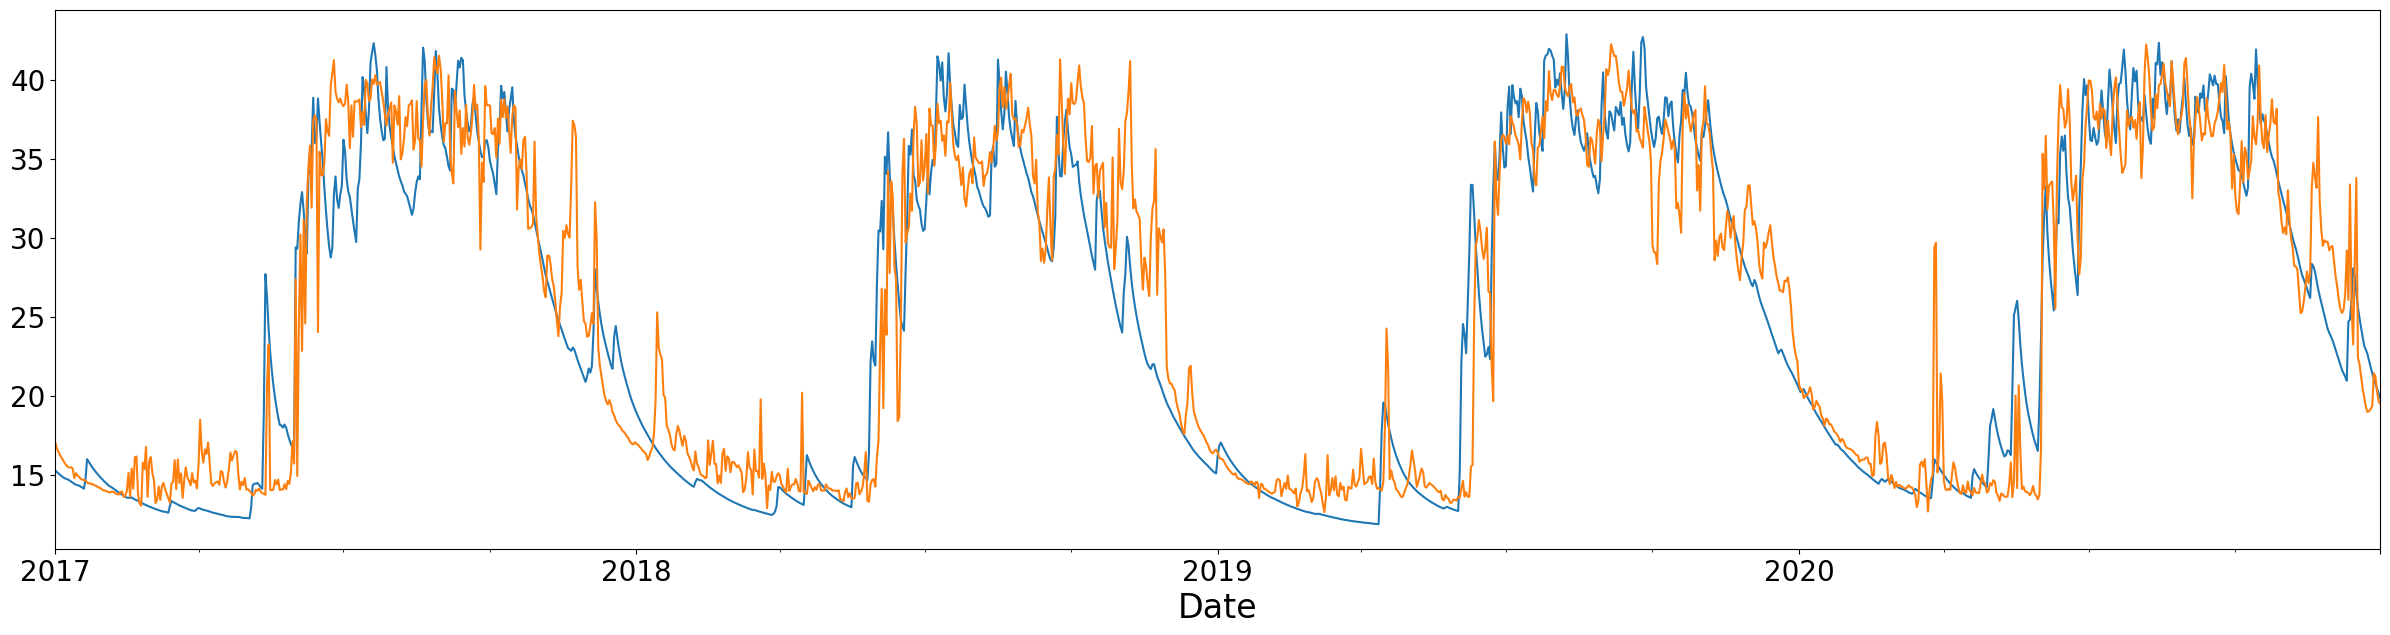

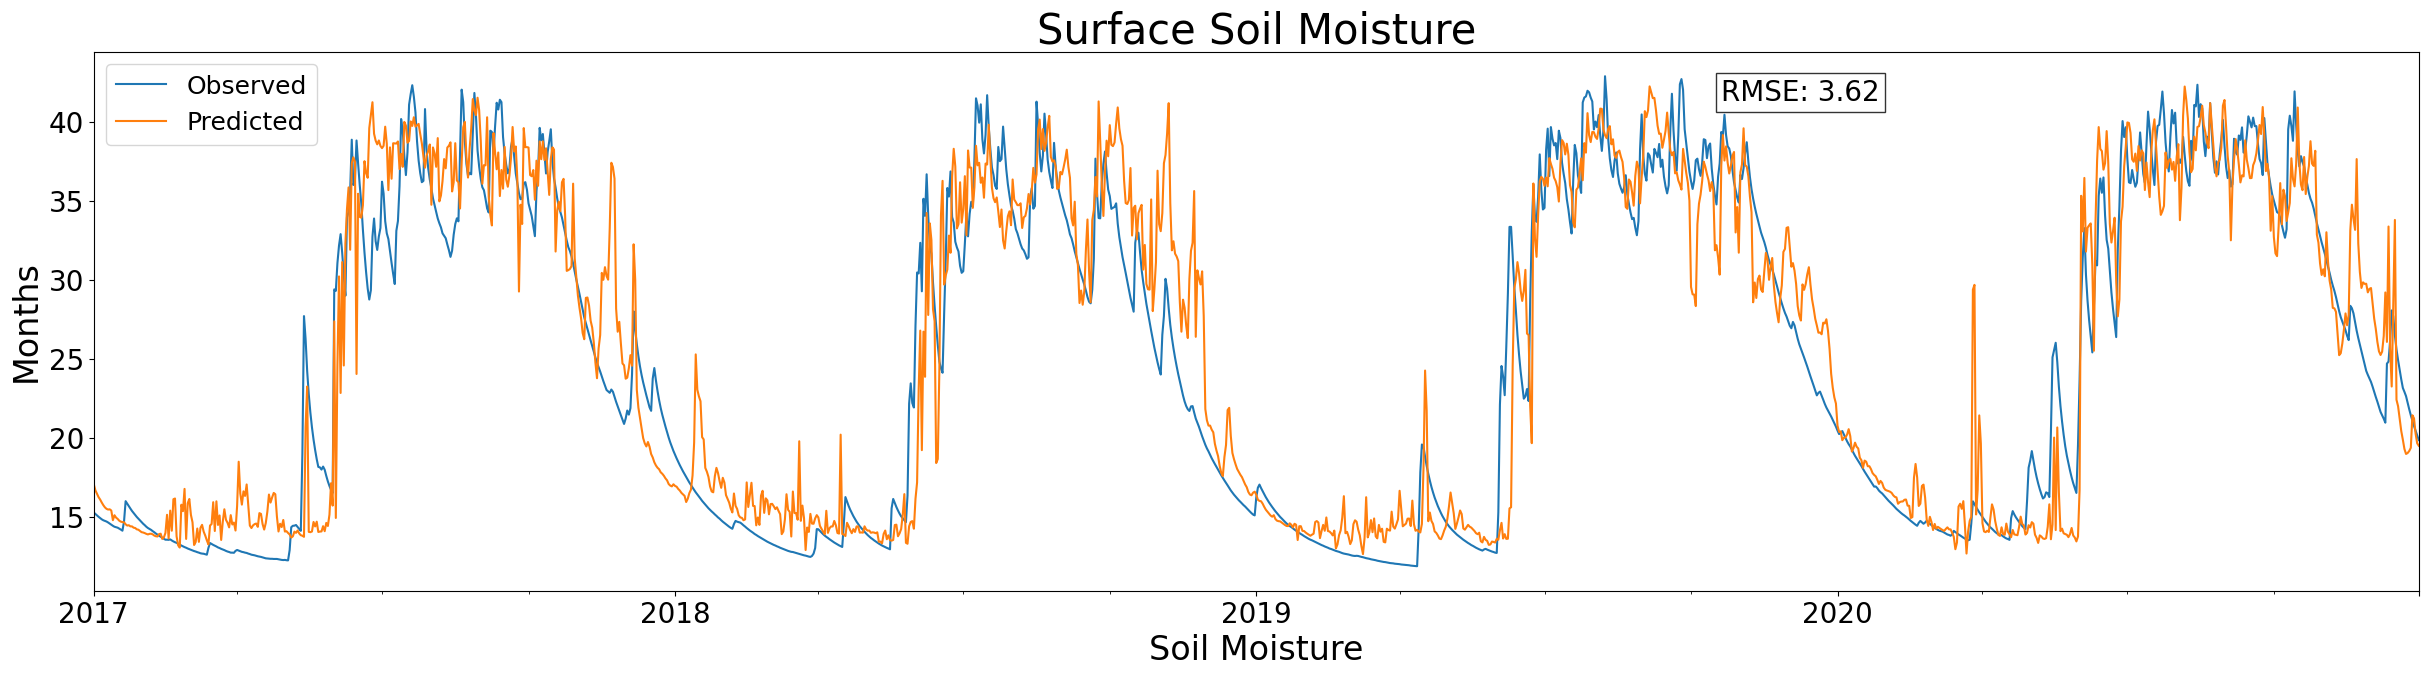

In [9]:
print("----At 10cm ddepth----")

X_train=train[[ 'Rain','St10', 'Air_Temperature','ref40']]
Y_train = train['SM10']
X_test=test[[ 'Rain','St10', 'Air_Temperature','ref40']]
Y_test = test['SM10']


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)
rmse = np.sqrt(mean_squared_error(Y_test, SMP))
fig,ax = plt.subplots(figsize=(30,7))
test['SM10'].plot(ax=ax,label='Observed surface soil moisture')
SMP_series.plot(ax=ax,label='predicted surface soil moisture')
#ax.axvline('2019-01-01',color='black',ls='--')
fig,ax = plt.subplots(figsize=(30,7))
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=40)
test['SM10'].plot(ax=ax,label='Observed surface soil moisture')
SMP_series.plot(ax=ax,label='predicted surface soil moisture')
ax.legend(['Observed','Predicted'])
rmse_text = f'RMSE: {rmse:.2f}'
ax.text(0.7, 0.95, rmse_text, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Surface Soil Moisture')
plt.show()


----At 30cm ddepth----


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 167.6807 - mae: 8.2041 - val_loss: 3.0507 - val_mae: 1.1547
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6742 - mae: 0.9042 - val_loss: 3.0716 - val_mae: 1.1331
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5662 - mae: 0.8874 - val_loss: 2.8028 - val_mae: 1.1285
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6902 - mae: 0.9305 - val_loss: 3.1915 - val_mae: 1.2274
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6306 - mae: 0.9019 - val_loss: 2.7192 - val_mae: 1.1253
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5370 - mae: 0.8792 - val_loss: 2.4722 - val_mae: 1.1394
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5887 - mae: 0.8886 - val_loss: 2.9167 - val_mae: 1.1461
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5878 - mae: 0.9095 - val_loss: 2.8905 - val_mae: 1.1454
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

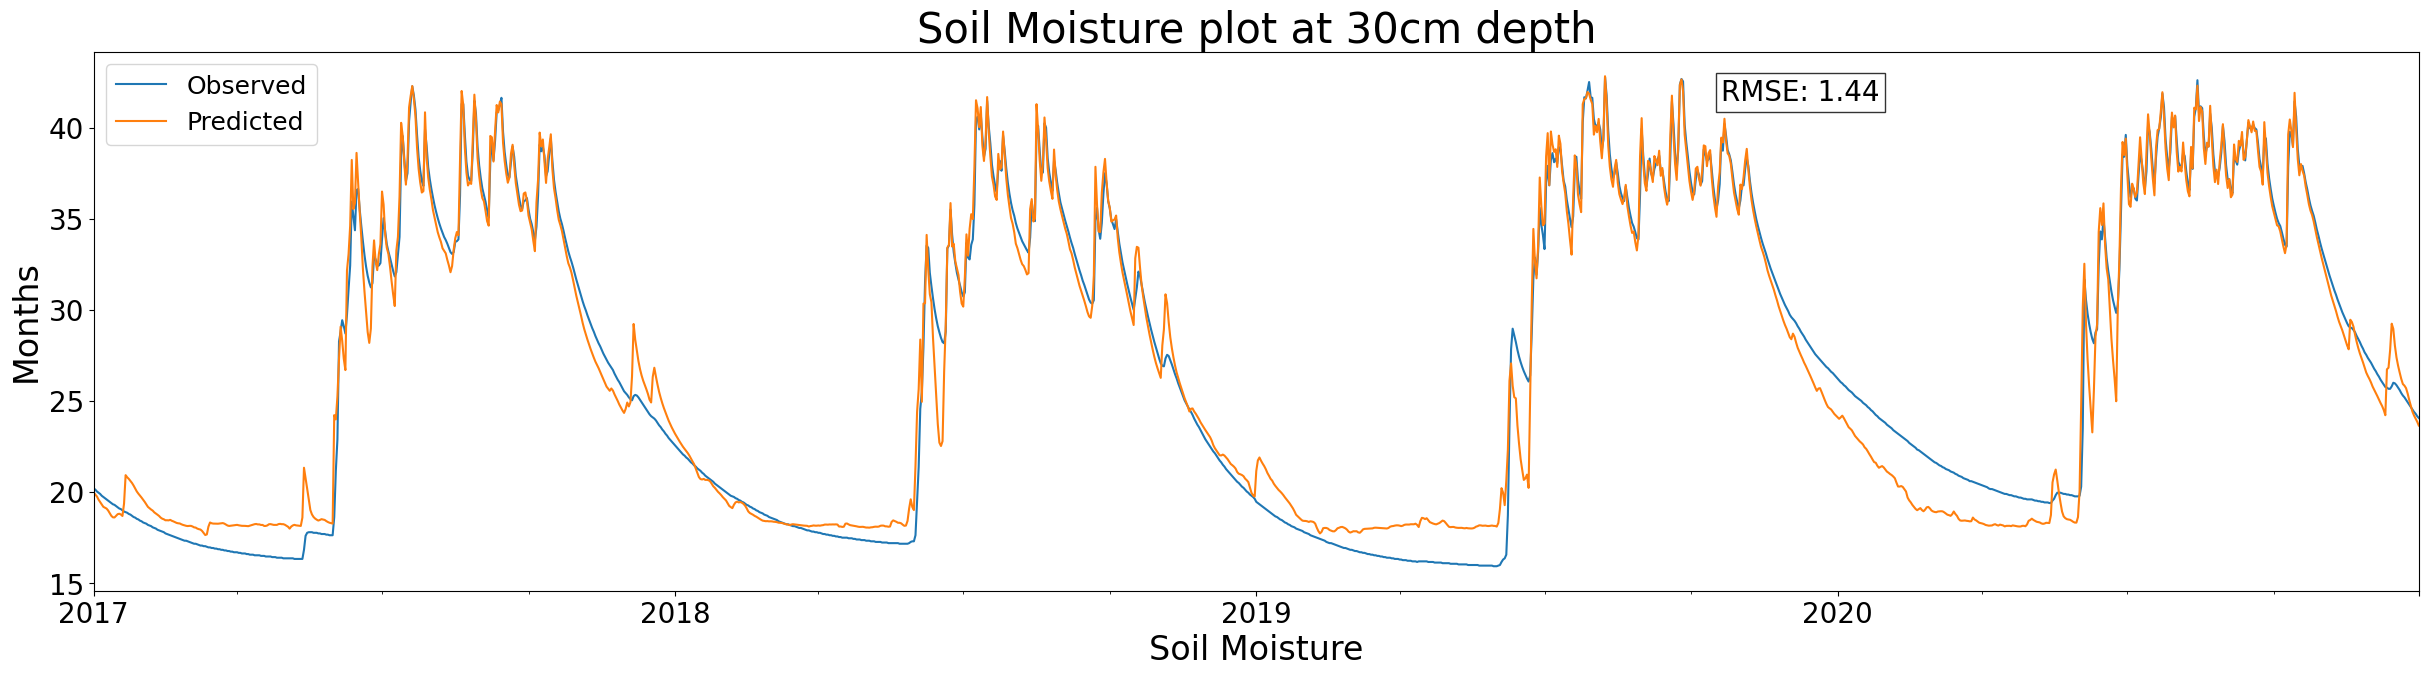

In [6]:
print("----At 30cm ddepth----")

X_train=train[[ 'SM10','St30']]
Y_train = train['SM30']
X_test=test[[  'SM10','St30']]
Y_test = test['SM30']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)
rmse = np.sqrt(mean_squared_error(Y_test, SMP))
fig,ax = plt.subplots(figsize=(30,7))
test['SM30'].plot(ax=ax,label='Observed  soil moisture at 30cm ')
SMP_series.plot(ax=ax,label='predicted  soil moisture at 30cm')
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=20)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Soil Moisture plot at 30cm depth')
rmse_text = f'RMSE: {rmse:.2f}'
ax.text(0.7, 0.95, rmse_text, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

----At 60cm ddepth----


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 147.6516 - mae: 7.7666 - val_loss: 2.8387 - val_mae: 1.0952
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5595 - mae: 0.7704 - val_loss: 1.9653 - val_mae: 0.8778
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0556 - mae: 0.6282 - val_loss: 1.5236 - val_mae: 0.7922
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0558 - mae: 0.6211 - val_loss: 1.8495 - val_mae: 0.7610
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0550 - mae: 0.6169 - val_loss: 1.7757 - val_mae: 0.8275
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0743 - mae: 0.6296 - val_loss: 1.3098 - val_mae: 0.6698
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0609 - mae: 0.6450 - val_loss: 2.0723 - val_mae: 0.8751
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9901 - mae: 0.6028 - val_loss: 2.2233 - val_mae: 1.1132
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

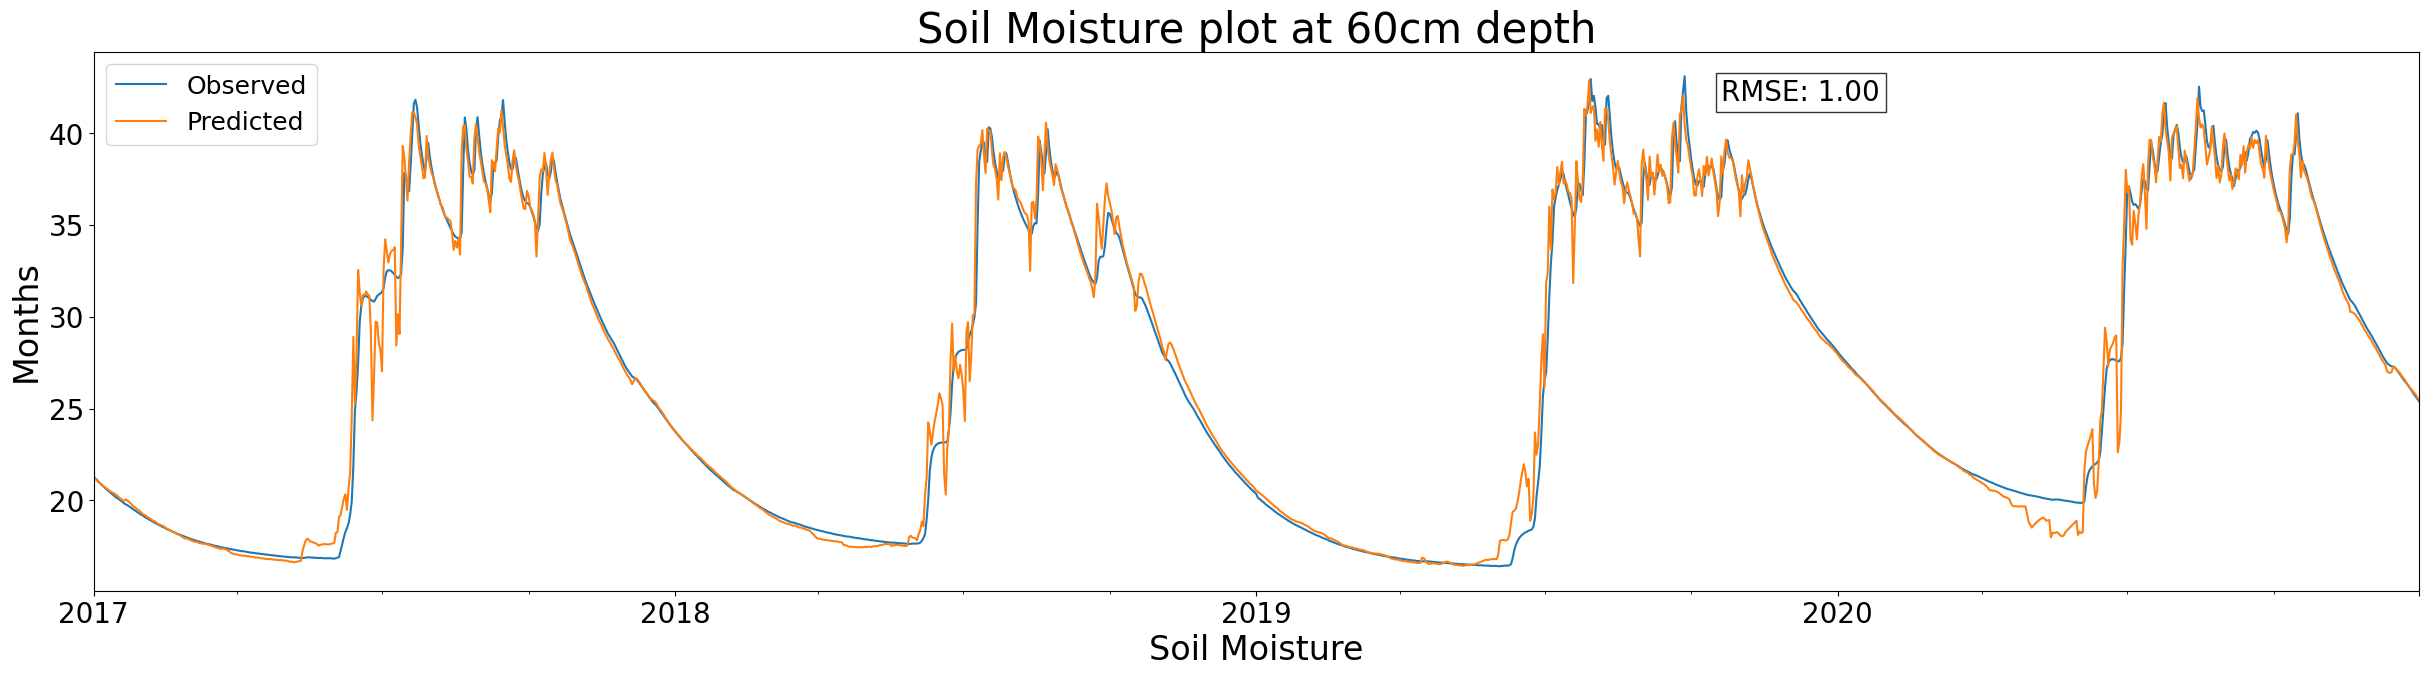

In [7]:

print("----At 60cm ddepth----")

X_train=train[[ 'SM10','St60','SM30']]
Y_train = train['SM60']
X_test=test[[ 'SM10','St60','SM30']]
Y_test = test['SM60']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)
rmse = np.sqrt(mean_squared_error(Y_test, SMP))

fig,ax = plt.subplots(figsize=(30,7))
test['SM60'].plot(ax=ax,label='Observed soil moisture at 60 cm')
SMP_series.plot(ax=ax,label='predicted soil moisture at 60cm')
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=60)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Soil Moisture plot at 60cm depth')
rmse_text = f'RMSE: {rmse:.2f}'
ax.text(0.7, 0.95, rmse_text, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

----At 100cm ddepth----


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 213.2026 - mae: 9.5292 - val_loss: 2.0522 - val_mae: 1.0046
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6450 - mae: 0.5559 - val_loss: 0.6783 - val_mae: 0.5437
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3595 - mae: 0.4115 - val_loss: 0.5280 - val_mae: 0.4900
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2915 - mae: 0.3715 - val_loss: 0.4111 - val_mae: 0.4336
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2558 - mae: 0.3370 - val_loss: 0.4247 - val_mae: 0.4113
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2602 - mae: 0.3455 - val_loss: 0.4274 - val_mae: 0.4114
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2683 - mae: 0.3635 - val_loss: 0.5009 - val_mae: 0.4988
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2244 - mae: 0.3228 - val_loss: 0.3879 - val_mae: 0.3740
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

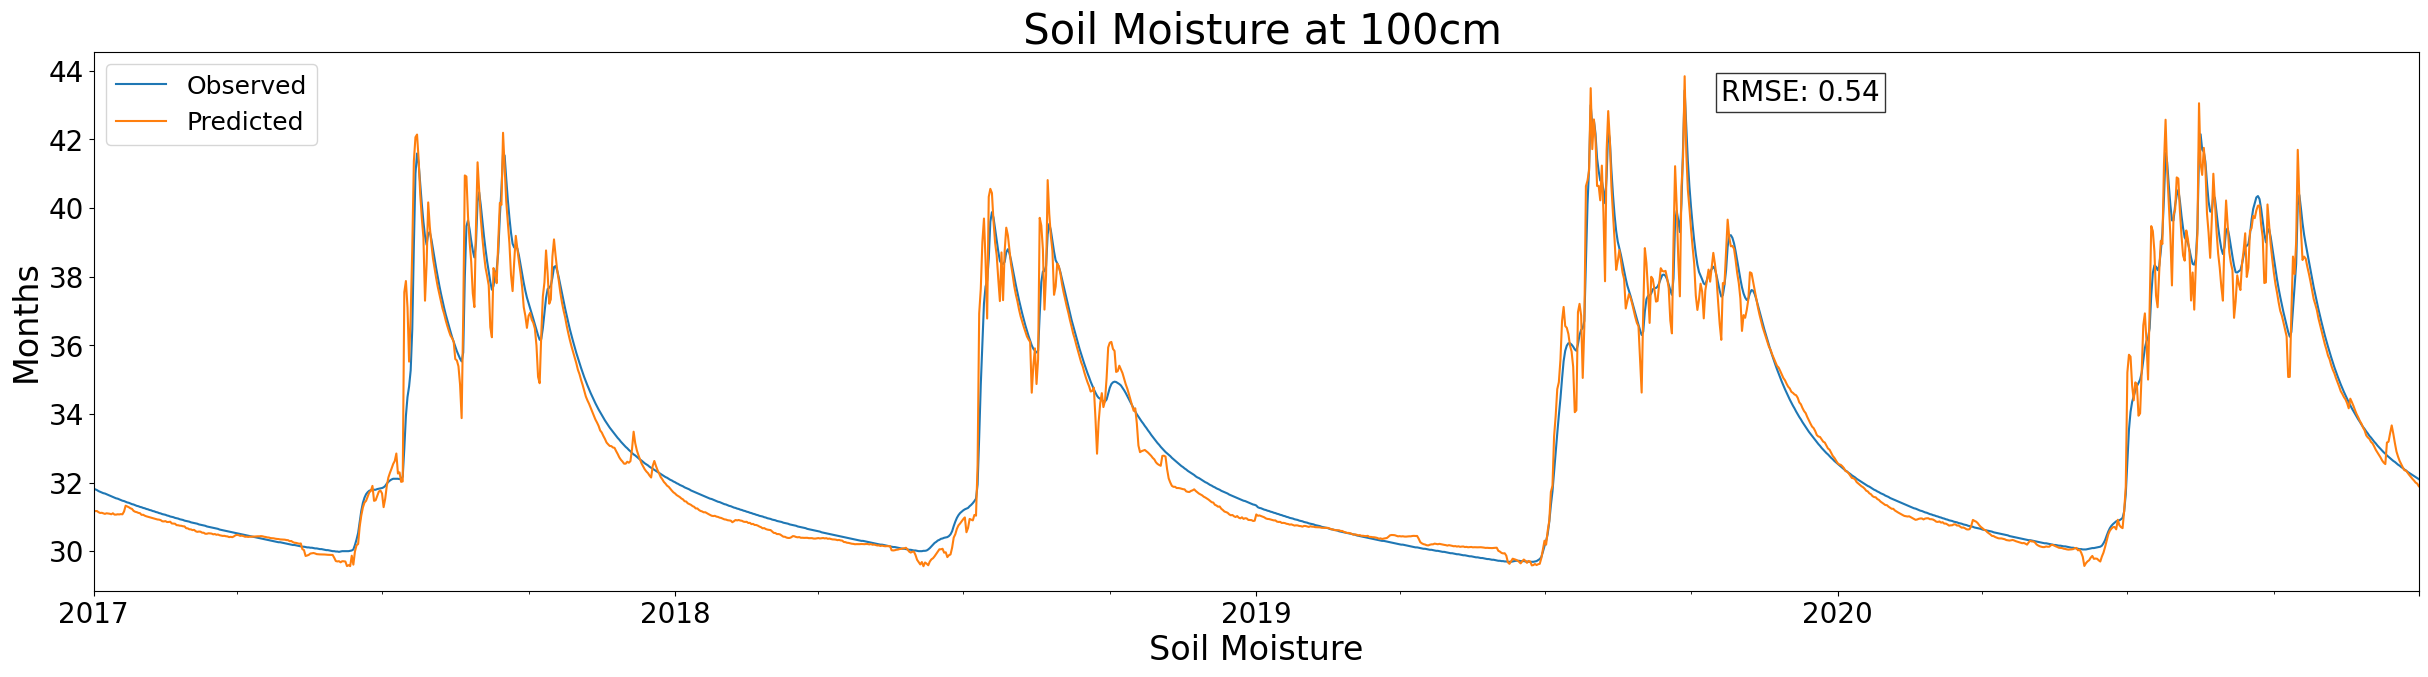

In [8]:
print("----At 100cm ddepth----")

X_train=train[[ 'SM10','SM60','SM30','St100']]
Y_train = train['SM100']
X_test=test[[ 'SM10','SM60','SM30','St100']]
Y_test = test['SM100']


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)
rmse = np.sqrt(mean_squared_error(Y_test, SMP))

fig,ax = plt.subplots(figsize=(30,7))
test['SM100'].plot(ax=ax,label='Observed surface soil moisture')
SMP_series.plot(ax=ax,label='predicted surface soil moisture')
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=20)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title(' Soil Moisture at 100cm')
rmse_text = f'RMSE: {rmse:.2f}'
ax.text(0.7, 0.95, rmse_text, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()
